# Examples of use the `straightfits` python  module
https://github.com/restrepo/straightfits

In [1]:
import sys
from pathlib import Path
cmd_folder=Path(Path.cwd()).parent.as_posix()
if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)

from straightfits import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np

# First example
It is possible to build the required input data to create the object, directly from the proper arrays

In [4]:
lux=pd.DataFrame()
lux['A']=1E36*np.array([0.00000000e+00, 8.48911168e-41, 1.95004609e-42, 3.75121862e-44,\
                        3.28089421e-45, 5.80846495e-46, 1.39568112e-45, 3.05245738e-45,\
                        5.63013735e-45, 1.07867168e-44, 1.93910180e-44])
lux['B']=np.array([0.00000000e+00, -9.02408269e-01, -5.20772861e-01, -1.90971186e-01,\
                   -5.03032503e-02, 7.66657692e-03, 3.11852240e-03, 1.34049663e-03,\
                   7.28957975e-04, 3.94487035e-04, 2.23523977e-04])
lux['corners']=np.array([7.89119649, 10., 12., 17., 30., 200., 450., 1000., 2000., 3500., 5000.])
lux.to_csv('lux.csv',index=False)

In [5]:
%%bash
#wget -O straightfits.py https://raw.githubusercontent.com/restrepo/straightfits/master/straightfits.py

##  Test: 
`lx(100) -> 1.2503067568647463e-09`

In [6]:
from straightfits import *
lx=straightfits()
lx.read_csv('lux.csv')
lx(100)

1.2503067568647463e-09

# Fit to arXiv:1504.04276 
[![Home](./ID.png)](./)

e-Print: arXiv:1504.04276 

illustration of the impact of DM-related astrophysical uncertainties: the constraint for the bb¯bb¯ channel spans the shaded band when varying the propagation parameters (dashed lines) or the halo profiles (solid lines). Notice that in the {\sc Min} case the analysis is not sensible, hence not shown here (see text for details).

## Full data
g3data was used to obtain the data points:

`sudo apt-get g3data`

In [7]:
id_max=pd.read_csv('ID_max.dat',header=None)

In [8]:
id_best=pd.read_csv('ID_best.dat',header=None)
id_med=pd.read_csv('ID_med.dat',header=None)

##  Fit to "Ein MAX" data

In [9]:
x=id_max.columns[0];y=id_max.columns[1];
ID_max=straightfits(id_max[x].values,id_max[y].values)

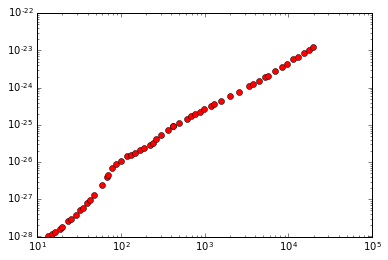

In [10]:
plt.loglog(ID_max.x,ID_max.y,'ro')

(3.1885625072236218e-29, 0.087865518251103197)

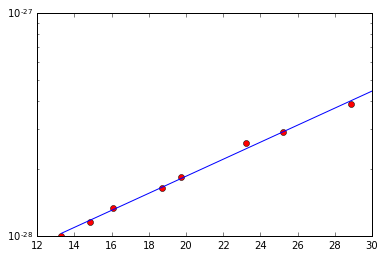

In [11]:
ID_max.add_segment(ID_max.x[0],30)

(7.0502531236431621e-29, 0.061236574066069492)

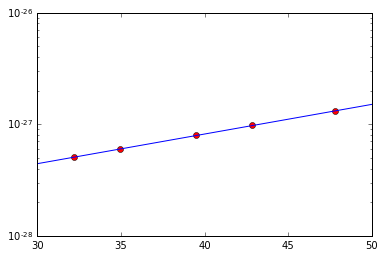

In [12]:
ID_max.add_segment(30,50)

(8.7568631769832991e-29, 0.055909277794195397)

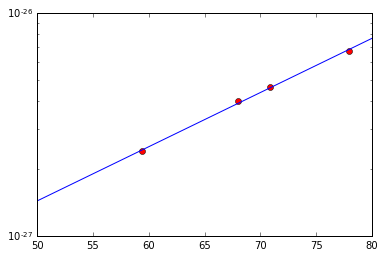

In [13]:
ID_max.add_segment(50,80)

(2.1348746139715722e-27, 0.016198290508616375)

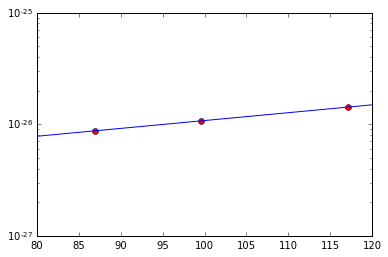

In [14]:
ID_max.add_segment(80,120)

(5.9756032379059683e-27, 0.0073764244377390025)

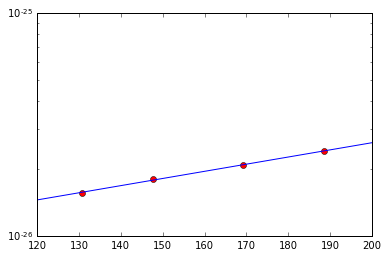

In [15]:
ID_max.add_segment(120,200)

(8.6373687028567866e-27, 0.0057472136669453134)

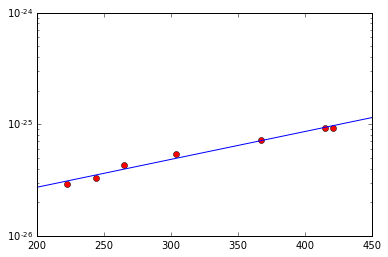

In [16]:
ID_max.add_segment(200,450)

(5.1356838694837219e-26, 0.0016901935995918807)

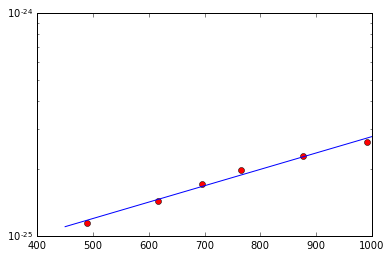

In [17]:
ID_max.add_segment(450,1000)

(1.3966907928539919e-25, 0.00072227121942208458)

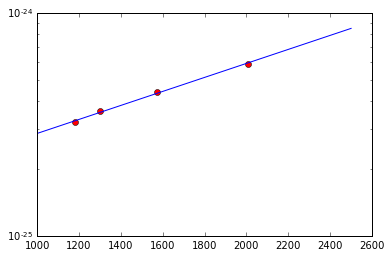

In [18]:
ID_max.add_segment(1000,2500)

(3.2046241609205609e-25, 0.00035205155008753426)

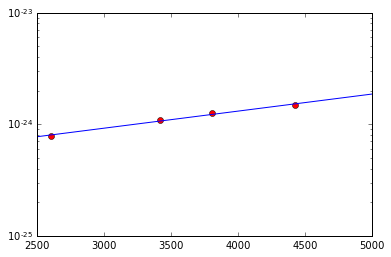

In [19]:
ID_max.add_segment(2500,5000)

(7.5328577909285287e-25, 0.00018219414222665078)

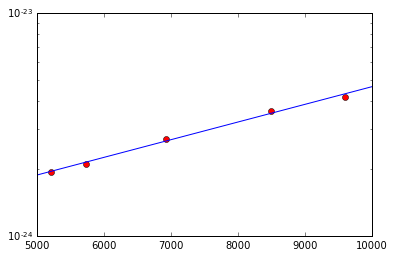

In [20]:
ID_max.add_segment(5000,10000)

(1.9620498738100953e-24, 9.4179725468413757e-05)

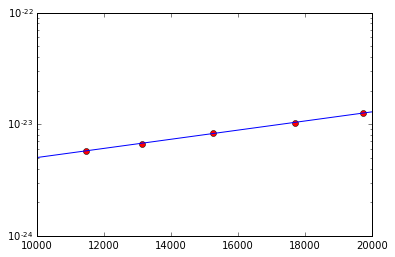

In [21]:
ID_max.add_segment(10000,20000)

In [22]:
ID_max.x[-1]

19729.894099200003

In [23]:
#ID_max.delete_last_segment()

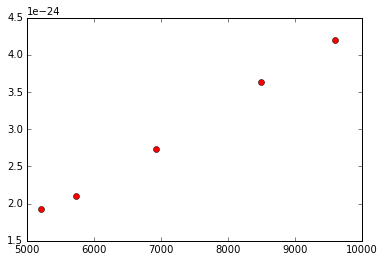

In [24]:
#check segment
chk=id_max[np.logical_and(id_max[x]>=5000,id_max[x]<10000)]
plt.plot(chk[x],chk[y],'ro')

(10, 20000)

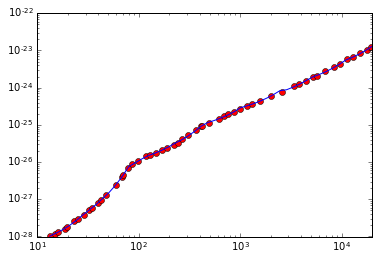

In [25]:
xmax=20000
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(ID_max.x[0]),np.log10(xmax-0.1))
plt.loglog(xx,ID_max(xx))
plt.xlim(10,xmax)

In [26]:
ID_max.to_csv('ID_max.csv')

## Check saved fit data 

In [27]:
ID_MAX=straightfits()
ID_MAX.read_csv('ID_max.csv')

(10, 20000.0)

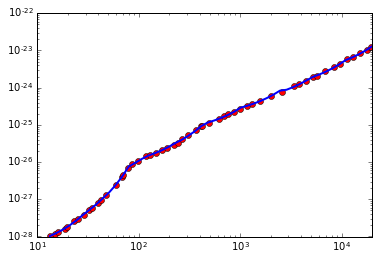

In [28]:
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(ID_MAX.corners.values[0]),np.log10(ID_MAX.corners.values[-1]-0.1))
plt.loglog(xx,ID_MAX(xx),'b-',lw=2)
plt.xlim(10,ID_MAX.corners.values[-1])

(1e-28, 2e-26)

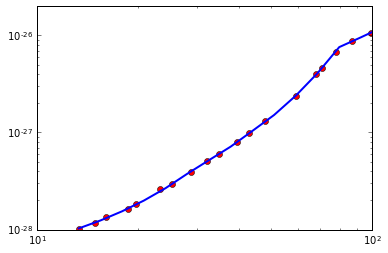

In [29]:
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(ID_MAX.corners.values[0]),np.log10(ID_MAX.corners.values[-1]-0.1))
plt.loglog(xx,ID_MAX(xx),'b-',lw=2)
plt.xlim(10,100)
plt.ylim(1E-28,2E-26)

#  Arxiv:1411.1335 Fig: 13
Fit to
[![Home](./sdfdm.png)](./)

##  Cross section data 

In [30]:
sdfdm_cs=pd.read_csv('sdfdm_cs.dat',header=None)

(100, 300)

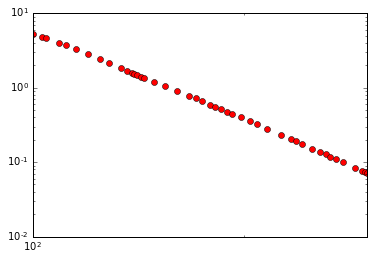

In [31]:
x=sdfdm_cs.columns[0];y=sdfdm_cs.columns[1];
SDFDM_cs=straightfits(sdfdm_cs[x].values,sdfdm_cs[y].values)
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
plt.xlim(100,300)

(124.78528199899444, -0.031498372083624208)

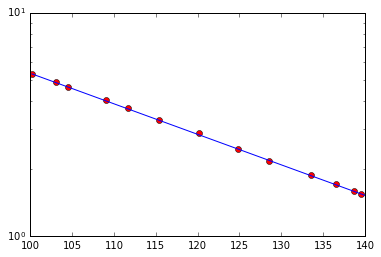

In [32]:
SDFDM_cs.add_segment(SDFDM_cs.x[0],140)

(36.814417526336747, -0.022982121165190061)

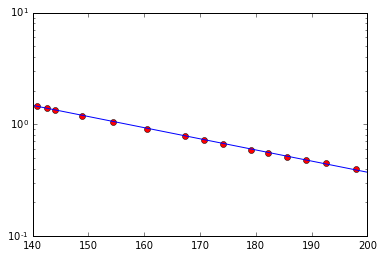

In [33]:
SDFDM_cs.add_segment(140,200)

(10.448944482212319, -0.016768579998579138)

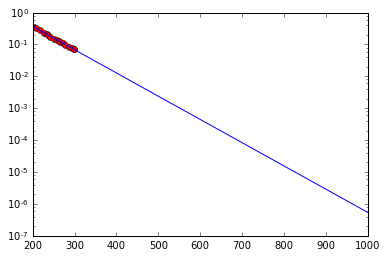

In [34]:
SDFDM_cs.add_segment(200,1000)

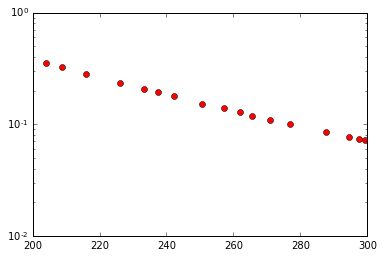

In [35]:
#check segment
chk=sdfdm_cs[np.logical_and(sdfdm_cs[x]>=200,sdfdm_cs[x]<300)]
plt.semilogy(chk[x],chk[y],'ro')

(100, 300)

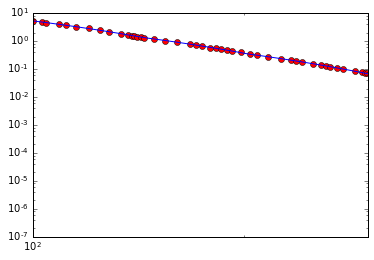

In [36]:
xmax=1000
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_cs.x[0]),np.log10(xmax-0.1))
plt.loglog(xx,SDFDM_cs(xx))
plt.xlim(100,300)

In [37]:
SDFDM_cs.to_csv('SDFDM_cs.csv')

## Check saved fit data 

In [38]:
SDFDM_CS=straightfits()
SDFDM_CS.read_csv('SDFDM_cs.csv')

(100, 300)

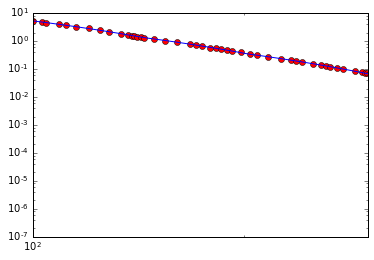

In [39]:
xmax=1000
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_CS.corners[0]),np.log10(xmax-0.1))
plt.loglog(xx,SDFDM_CS(xx))
plt.xlim(100,300)

## Exclude cross section data

In [40]:
sdfdm_exc_cs=pd.read_csv('sdfdm_exc_cs.dat',header=None)
x=sdfdm_exc_cs.columns[0];y=sdfdm_exc_cs.columns[1]

In [41]:
sdfdm_exc_cs=sdfdm_exc_cs.append({x:1000,y:sdfdm_exc_cs[y].values[-1]},ignore_index=True)

(100, 1000)

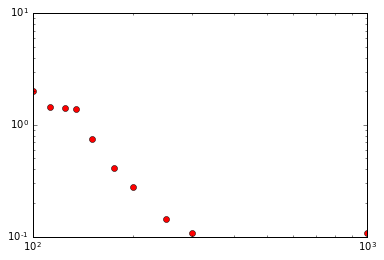

In [42]:
SDFDM_exc_cs=straightfits(sdfdm_exc_cs[x].values,sdfdm_exc_cs[y].values)
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
plt.xlim(100,1000)

In [43]:
for i in range(sdfdm_exc_cs.shape[0]-1):
    SDFDM_exc_cs.add_segment(sdfdm_exc_cs[x].values[i],sdfdm_exc_cs[x].values[i+1],ShowPlot=False)

(100, 1000.0)

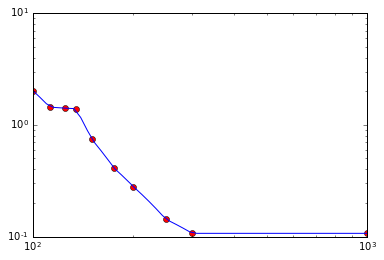

In [44]:
xmax=sdfdm_exc_cs[x].values[i+1]
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_exc_cs.x[0]),np.log10(xmax-0.1))
plt.loglog(xx,SDFDM_exc_cs(xx))
plt.xlim(100,xmax)

In [45]:
SDFDM_exc_cs.to_csv('SDFDM_exc_cs.csv')

## Check save fit data 

In [46]:
SDFDM_exc_CS=straightfits()
SDFDM_exc_CS.read_csv('SDFDM_exc_cs.csv')

(100, 1000)

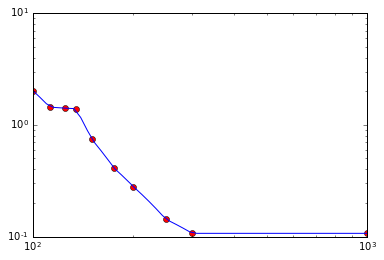

In [47]:
xmax=1000
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_exc_CS.corners[0]),np.log10(xmax-0.1))
plt.loglog(xx,SDFDM_exc_CS(xx))
plt.xlim(100,xmax)